In [112]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [113]:
df= pd.read_csv("original_final.csv", sep=',')
df.head()

,dayofservice,tripID,progrnumber,stop_id,plannedtime_arr_stop,plannedtime_dep_stop,actualtime_arr_stop,actualtime_dep_stop,suppressed_stop,justificationid_stop,...,rain,temp,wdsp,actualtime_delay,plannedtime_timeonstop,actualtime_timeonstop,actualtime_onroad,plannedtime_onroad,plannedtime_route,target
0,1459382400,2896014,66,4175,65040,65040,64992,65004,NaN,NaN,...,0.0,9.1,7.0,-48,0,12,5647.0,5640,5890,-36
1,1459382400,2909984,66,4175,63840,63840,63200,63215,1.0,2.016033e+14,...,0.0,9.1,7.0,-640,0,15,NaN,5640,5890,-625
2,1459382400,2899854,66,4175,65373,65373,64321,64325,NaN,NaN,...,0.0,9.1,7.0,-1052,0,4,4689.0,5673,5882,-1048
3,1459382400,2895648,66,4175,64773,64773,64600,64617,NaN,NaN,...,0.0,9.1,7.0,-173,0,17,5624.0,5673,5882,-156
4,1459382400,2906131,66,4175,63240,63240,63330,63341,NaN,NaN,...,0.0,9.1,7.0,90,0,11,5743.0,5640,5890,101


In [114]:
df.columns

Index(['dayofservice', 'tripID', 'progrnumber', 'stop_id',
       'plannedtime_arr_stop', 'plannedtime_dep_stop', 'actualtime_arr_stop',
       'actualtime_dep_stop', 'suppressed_stop', 'justificationid_stop',
       'routeid', 'direction', 'plannedtime_arr', 'plannedtime_dep',
       'actualtime_arr', 'actualtime_dep', 'suppressed', 'justificationid',
       'stationid', 'timeofarrival_year', 'timeofarrival_month',
       'timeofarrival_dayofweek', 'timeofarrival_hour',
       'timeofarrival_weekday', 'rain', 'temp', 'wdsp', 'actualtime_delay',
       'plannedtime_timeonstop', 'actualtime_timeonstop', 'actualtime_onroad',
       'plannedtime_onroad', 'plannedtime_route', 'target'],
      dtype='object')

In [115]:
df = df.drop(['dayofservice','tripID','plannedtime_arr_stop','plannedtime_dep_stop','actualtime_arr_stop','actualtime_dep_stop','plannedtime_arr','plannedtime_dep','actualtime_arr','actualtime_dep','actualtime_delay','actualtime_timeonstop','stationid'],axis =1)

In [116]:
df.routeid.unique()

array(['145_102', '145_99', '145_105', '145_91', '145_93', '145_88',
       '145_107', '145_106', '145_104', '145_94', '145_87', '145_89',
       '145_86', '145_95'], dtype=object)

In [117]:
df.plannedtime_timeonstop.unique()

array([0], dtype=int64)

In [118]:
df.notnull().mean()

progrnumber                1.000000
stop_id                    1.000000
suppressed_stop            0.018689
justificationid_stop       0.018689
routeid                    1.000000
direction                  1.000000
suppressed                 0.001764
justificationid            0.001764
timeofarrival_year         1.000000
timeofarrival_month        1.000000
timeofarrival_dayofweek    1.000000
timeofarrival_hour         1.000000
timeofarrival_weekday      1.000000
rain                       1.000000
temp                       1.000000
wdsp                       1.000000
plannedtime_timeonstop     1.000000
actualtime_onroad          0.952854
plannedtime_onroad         1.000000
plannedtime_route          1.000000
target                     1.000000
dtype: float64

In [119]:
df = df[pd.isnull(df['suppressed_stop'])]
df = df[pd.notnull(df['actualtime_onroad'])]

In [120]:
df.notnull().mean()

progrnumber                1.0
stop_id                    1.0
suppressed_stop            0.0
justificationid_stop       0.0
routeid                    1.0
direction                  1.0
suppressed                 0.0
justificationid            0.0
timeofarrival_year         1.0
timeofarrival_month        1.0
timeofarrival_dayofweek    1.0
timeofarrival_hour         1.0
timeofarrival_weekday      1.0
rain                       1.0
temp                       1.0
wdsp                       1.0
plannedtime_timeonstop     1.0
actualtime_onroad          1.0
plannedtime_onroad         1.0
plannedtime_route          1.0
target                     1.0
dtype: float64

In [121]:
df = df.drop(["justificationid_stop","justificationid","suppressed_stop","suppressed","plannedtime_timeonstop"],axis=1)
df.head()

,progrnumber,stop_id,routeid,direction,timeofarrival_year,timeofarrival_month,timeofarrival_dayofweek,timeofarrival_hour,timeofarrival_weekday,rain,temp,wdsp,actualtime_onroad,plannedtime_onroad,plannedtime_route,target
0,66,4175,145_102,1,2016,3,3,18,3,0.0,9.1,7.0,5647.0,5640,5890,-36
2,66,4175,145_102,1,2016,3,3,18,3,0.0,9.1,7.0,4689.0,5673,5882,-1048
3,66,4175,145_102,1,2016,3,3,17,3,0.0,9.1,7.0,5624.0,5673,5882,-156
4,66,4175,145_102,1,2016,3,3,17,3,0.0,9.1,7.0,5743.0,5640,5890,101
5,44,4175,145_99,1,2016,3,3,18,3,0.0,9.1,7.0,3260.0,3132,3430,109


In [122]:
df.dtypes

progrnumber                  int64
stop_id                      int64
routeid                     object
direction                    int64
timeofarrival_year           int64
timeofarrival_month          int64
timeofarrival_dayofweek      int64
timeofarrival_hour           int64
timeofarrival_weekday        int64
rain                       float64
temp                       float64
wdsp                       float64
actualtime_onroad          float64
plannedtime_onroad           int64
plannedtime_route            int64
target                       int64
dtype: object

In [123]:
df['progrnumber'] = df['progrnumber'].astype('category')
df['stop_id'] = df['stop_id'].astype('category')
df['timeofarrival_year']= df['timeofarrival_year'].astype('category')
df['timeofarrival_month']= df['timeofarrival_month'].astype('category')
df['timeofarrival_dayofweek']= df['timeofarrival_dayofweek'].astype('category')
df['timeofarrival_hour']= df['timeofarrival_hour'].astype('category')
df['timeofarrival_weekday']= df['timeofarrival_weekday'].astype('category')
df['direction']= df['direction'].astype('category')
df['routeid']= df['routeid'].astype('category')
df['target']=df['target'].astype('float')
df['plannedtime_route']=df['plannedtime_route'].astype('float')
df['plannedtime_onroad']=df['plannedtime_onroad'].astype('float')

In [124]:
df.dtypes

progrnumber                category
stop_id                    category
routeid                    category
direction                  category
timeofarrival_year         category
timeofarrival_month        category
timeofarrival_dayofweek    category
timeofarrival_hour         category
timeofarrival_weekday      category
rain                        float64
temp                        float64
wdsp                        float64
actualtime_onroad           float64
plannedtime_onroad          float64
plannedtime_route           float64
target                      float64
dtype: object

In [125]:
df.shape

(2771435, 16)

In [126]:
df = df.loc[df["routeid"].isin(["145_102", "145_105"])]

In [127]:
df.routeid.unique()

[145_102, 145_105]
Categories (2, object): [145_102, 145_105]

In [128]:
df_1 = df.loc[df["direction"].isin([1])]

In [129]:
df_1.direction.unique()

[1]
Categories (1, int64): [1]

In [130]:
df_1.shape

(1332932, 16)

## One Hot Encoding

In [131]:
df_1.sample(10)

,progrnumber,stop_id,routeid,direction,timeofarrival_year,timeofarrival_month,timeofarrival_dayofweek,timeofarrival_hour,timeofarrival_weekday,rain,temp,wdsp,actualtime_onroad,plannedtime_onroad,plannedtime_route,target
2908074,20,760,145_102,1,2017,5,5,12,5,0.0,14.0,16.0,2027.0,1817.0,5612.0,251.0
2468693,7,334,145_102,1,2017,3,0,20,0,0.0,2.6,12.0,552.0,535.0,3585.0,62.0
1063645,9,747,145_102,1,2016,3,3,22,3,0.0,6.7,6.0,1073.0,886.0,3949.0,310.0
936057,27,2010,145_102,1,2016,4,1,18,1,0.0,9.3,8.0,2709.0,2619.0,5359.0,144.0
99357,67,5091,145_102,1,2016,5,1,10,1,0.0,14.1,8.0,5332.0,4892.0,5014.0,405.0
1532451,22,762,145_102,1,2016,5,2,19,2,0.0,15.0,11.0,2298.0,2206.0,5414.0,190.0
1234995,17,757,145_102,1,2016,3,6,18,6,0.4,6.5,19.0,1979.0,1560.0,4642.0,416.0
2523357,30,4571,145_102,1,2017,2,3,17,3,0.0,3.0,13.0,2938.0,2674.0,5363.0,255.0
532831,62,4173,145_102,1,2016,3,2,19,2,0.0,7.1,10.0,5147.0,5128.0,5556.0,35.0
12410,62,4172,145_102,1,2016,2,4,20,4,0.0,7.9,19.0,3918.0,3932.0,4373.0,15.0


In [133]:
df_1 = df_1.drop(['routeid','timeofarrival_dayofweek','timeofarrival_year','actualtime_onroad', 'direction'],axis = 1)

In [134]:
df_1.sample(10)

,progrnumber,stop_id,timeofarrival_month,timeofarrival_hour,timeofarrival_weekday,rain,temp,wdsp,plannedtime_onroad,plannedtime_route,target
2946319,63,4173,6,8,1,0.0,10.5,16.0,4070.0,4514.0,-478.0
27844,60,4171,6,17,4,0.0,15.6,10.0,5084.0,5625.0,1002.0
1149936,22,762,5,11,1,0.0,14.3,8.0,2155.0,5160.0,25.0
2460180,45,3133,3,13,4,0.0,11.5,12.0,3226.0,4953.0,725.0
212711,51,4125,5,19,5,0.0,12.3,2.0,3663.0,5889.0,-240.0
1980355,18,758,6,19,2,0.0,15.9,6.0,1719.0,4444.0,-202.0
2099926,12,846,3,21,2,0.0,4.4,12.0,1089.0,3949.0,32.0
210656,53,4127,5,13,3,0.0,16.3,14.0,3975.0,5304.0,468.0
1409032,41,3129,2,8,2,0.0,3.9,21.0,2944.0,4873.0,693.0
200251,61,4172,6,22,5,0.1,12.5,4.0,3982.0,4447.0,-86.0


In [135]:
df_1 = df_1.drop(['progrnumber'],axis = 1 )

In [141]:
df_1.to_csv("df_1.csv",index=False)

##  Visualize Data

Text(0.5,1,'StopID')

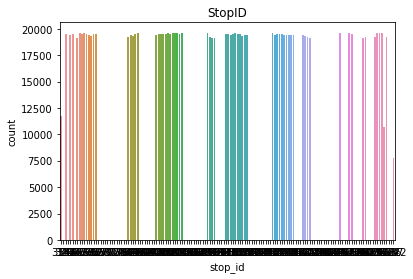

In [136]:
import seaborn as sns
sns.countplot(df_1["stop_id"]).set_title("StopID")

In [138]:
df_1.stop_id.unique()

[4175, 3138, 3139, 4124, 4126, ..., 3134, 3135, 3136, 7453, 7622]
Length: 70
Categories (70, int64): [4175, 3138, 3139, 4124, ..., 3135, 3136, 7453, 7622]

In [140]:
stopdf = pd.get_dummies(df_1['stop_id'])
stopdf.shape

(1332932, 144)

## standard the data

In [92]:
stopsList  =  df_1.stop_id.unique().tolist()
len(stopsList)

70

In [93]:
df.routeid.unique()

[145_102]
Categories (1, object): [145_102]

In [94]:
df.stop_id.unique()

[4175, 3138, 3139, 4124, 4126, ..., 3134, 3135, 3136, 7453, 7622]
Length: 70
Categories (70, int64): [4175, 3138, 3139, 4124, ..., 3135, 3136, 7453, 7622]

In [101]:
df.head()

,stop_id,routeid,timeofarrival_month,timeofarrival_hour,timeofarrival_weekday,rain,temp,wdsp,plannedtime_onroad,plannedtime_route,target
0,4175,145_102,3,18,3,0.0,9.1,7.0,5640.0,5890.0,-36.0
2,4175,145_102,3,18,3,0.0,9.1,7.0,5673.0,5882.0,-1048.0
3,4175,145_102,3,17,3,0.0,9.1,7.0,5673.0,5882.0,-156.0
4,4175,145_102,3,17,3,0.0,9.1,7.0,5640.0,5890.0,101.0
6,4175,145_102,3,18,3,0.0,9.1,7.0,5673.0,5882.0,-333.0


In [98]:
stopdf = pd.get_dummies(df['stop_id'])

In [99]:
stopdf.head()

,315,325,334,345,406,435,461,747,756,757,...,6000,7294,7353,7361,7362,7453,7574,7586,7587,7622
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
df.dtypes

stop_id                  category
routeid                  category
timeofarrival_month      category
timeofarrival_hour       category
timeofarrival_weekday    category
rain                      float64
temp                      float64
wdsp                      float64
plannedtime_onroad        float64
plannedtime_route         float64
target                    float64
dtype: object

In [77]:
sparsedf.shape

(2612112, 199)

## Statandard the data

In [79]:
from sklearn import preprocessing
normalized_sparsedf = preprocessing.normalize(sparsedf)

In [80]:
DF = pd.DataFrame(normalized_sparsedf, columns=sparsedf.columns,index= sparsedf.index)

In [81]:
y = DF['target']

In [82]:
X = DF.drop(['target'],axis =1)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state= 0 )

In [84]:
X_train.shape

(2350900, 198)

In [85]:
X_test.shape

(261212, 198)

In [97]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(200,200), max_iter = 1000, solver='lbfgs', \
                   alpha=0.01, activation = 'tanh', random_state = 8)

In [98]:
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)

MemoryError: 

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,predictions)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

In [ ]:
mlp.score(X_test, y_test)

In [70]:
MAEList = []
R2 = []
for i in stopsList:
    df_stop = df.loc[df['stop_id'] == i]
    con_df_stop = pd.get_dummies(df_stop,columns=['progrnumber','routeid','direction','timeofarrival_year','timeofarrival_month','timeofarrival_weekday','timeofarrival_hour'])
    con_df_stop = con_df_stop.drop(['stop_id'],axis =1 )
    normalized_df = preprocessing.normalize(con_df_stop)
    DF = pd.DataFrame(normalized_df, columns=con_df_stop.columns,index= con_df_stop.index)
    y = DF['target']
    X = DF.drop(['target'],axis =1)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state= 0 )
    mlp.fit(X_train,y_train)
    predictions = mlp.predict(X_test)
    MAE = mean_absolute_error(y_test,predictions)
    r2 = r2_score(y_test,predictions)
    MAEList.append(MAE)
    R2.append(r2)


In [72]:
print(MAEList)

[0.010393827820955838, 0.011544127654383028, 0.011143378414630664, 0.011528116631148546, 0.011432488555357301, 0.011206094312495488, 0.012212695935591471, 0.016778507573300384, 0.015815332375224797, 0.013999299636841121, 0.013142932391943323, 0.012340353008883188, 0.012200148266020366, 0.0118394592522815, 0.010794427605817652, 0.01153536893514016, 0.010283947153970322, 0.011938555225908181, 0.01035317651722626, 0.012056874249783557, 0.015229284406914597, 0.011976777359732012, 0.012846682480269421, 0.014996291570011904, 0.017337005176119066, 0.01800510204970704, 0.017752261096785068, 0.020404680448753862, 0.013939050560146238, 0.014779412388304663, 0.015507470956706812, 0.01135880090018938, 0.016552319285261848, 0.019546530836641957, 0.010429205407603186, 0.011374575006011465, 0.011273114364323357, 0.011040287102314176, 0.011546668120344097, 0.01039286924302421, 0.011237676927109804, 0.012352754680924477, 0.010790830986753604, 0.01192787571542413, 0.015407226770700999, 0.012227757247984

In [74]:
result = pd.DataFrame({'stop_id':stopsList,"MAE":MAEList,"R2":R2})

In [75]:
result

,stop_id,MAE,R2
0,4175,0.010394,0.931175
1,3138,0.011544,0.922351
2,3139,0.011143,0.898577
3,4124,0.011528,0.903011
4,4126,0.011432,0.882389
5,4127,0.011206,0.902901
6,4128,0.012213,0.837001
7,4129,0.016779,0.862728
8,4131,0.015815,0.863142
9,7294,0.013999,0.885108


In [86]:
result.to_csv("ANN_route_145.csv", index = False)

In [81]:
res_lessthan5 = result.loc[result["R2"] <= 0.5]

In [82]:
df["stop_id"].value_counts().tail(15)

792     18496
4201    18486
4180    18473
4179    18426
2994    18425
4178    18391
2993    18390
4177    18098
315     12099
7453    11071
7622     8096
767       601
6000      377
4533      126
4844      125
Name: stop_id, dtype: int64

In [84]:
MAEList = []
R2 = []
lessthan5 = res_lessthan5['stop_id'].tolist()
for i in lessthan5:
    df_stop = df.loc[df['stop_id'] == i]
    con_df_stop = pd.get_dummies(df_stop,columns=['progrnumber','routeid','direction','timeofarrival_year','timeofarrival_month','timeofarrival_weekday','timeofarrival_hour'])
    con_df_stop = con_df_stop.drop(['stop_id'],axis =1 )
    normalized_df = preprocessing.normalize(con_df_stop)
    DF = pd.DataFrame(normalized_df, columns=con_df_stop.columns,index= con_df_stop.index)
    y = DF['target']
    X = DF.drop(['target'],axis =1)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state= 0 )
    mlp.fit(X_train,y_train)
    predictions = mlp.predict(X_test)
    MAE = mean_absolute_error(y_test,predictions)
    r2 = r2_score(y_test,predictions)
    MAEList.append(MAE)
    R2.append(r2)

[0.01057794768104392,
 0.01949318478557438,
 0.015057541373136196,
 0.02987865725732408,
 0.02470479137565884,
 0.027985669563872828,
 0.34567883820511813,
 0.43956556845535966,
 0.4939916162206507,
 -0.13072979799385065,
 -0.03688081426897605,
 0.017087557856773627,
 0.21310904473994308,
 0.0007962261034702989,
 0.36474429196087244]

In [ ]:
res_lessthan5 = result.loc[result["R2"] <= 0.5]

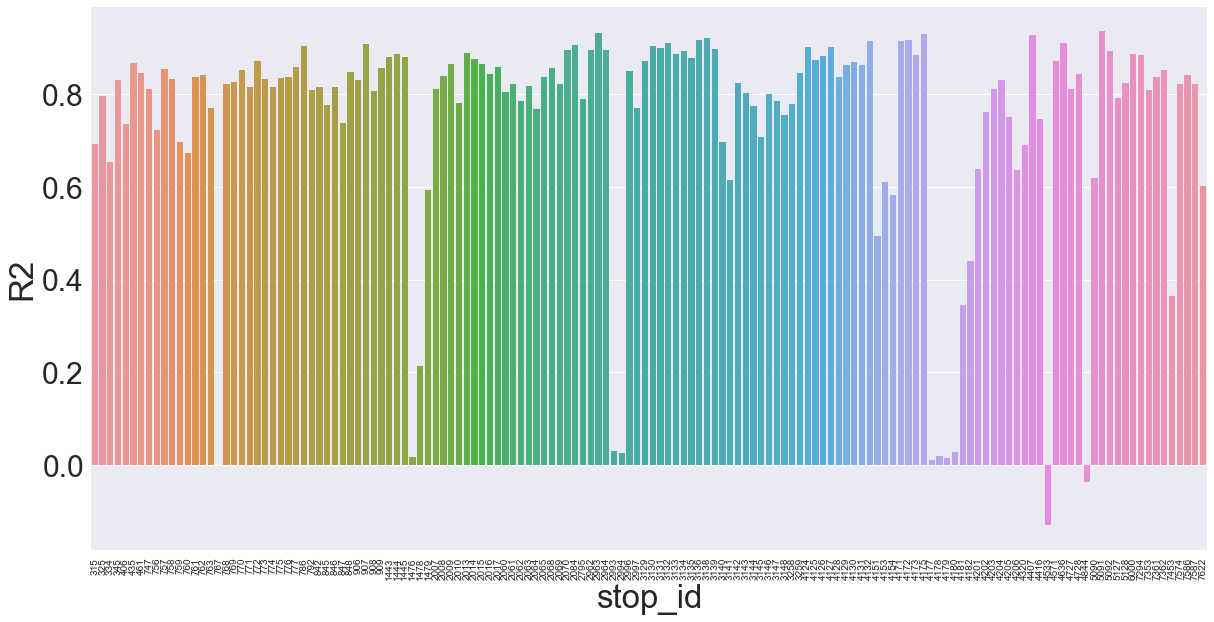

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("ticks")
sns.set(font_scale = 3)
fig,ax = plt.subplots(figsize=(20,10))
b = sns.barplot(x="stop_id",y="R2", data=result)
b.set_xticklabels(b.get_xticklabels(), rotation=90,fontsize = 10)
plt.savefig('foo.png')

In [161]:
result["R2"].mean()

0.7493826998612686